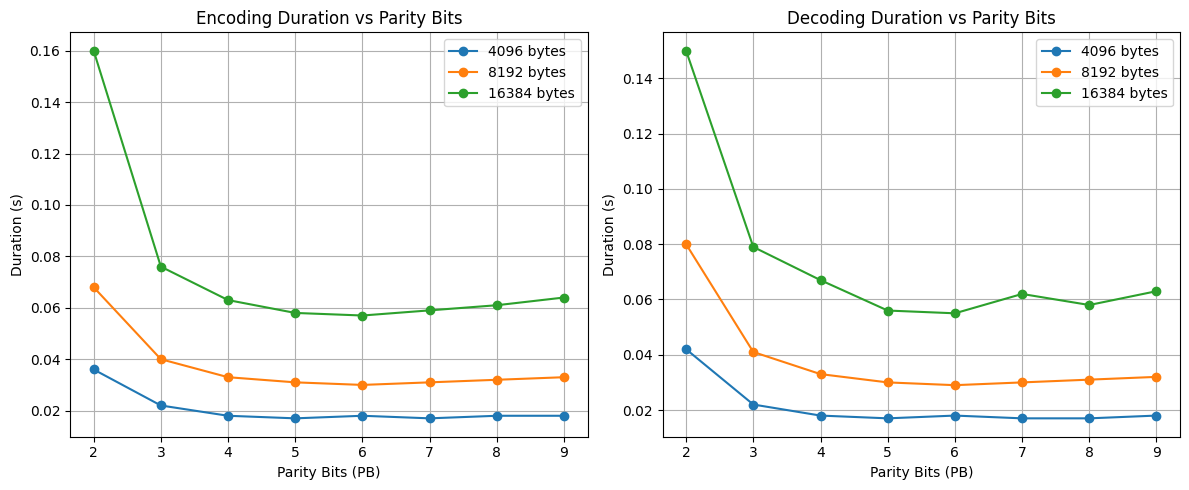

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data_enc = {
    "PB":    [ 2, 3, 4, 5, 6, 7, 8, 9 ],
    "4096":  [ 0.036, 0.022, 0.018, 0.017, 0.018, 0.017, 0.018, 0.018 ],
    "8192":  [ 0.068, 0.040, 0.033, 0.031, 0.030, 0.031, 0.032, 0.033 ],
    "16384": [ 0.160, 0.076, 0.063, 0.058, 0.057, 0.059, 0.061, 0.064 ]
}

data_dec = {
    "PB":    [ 2, 3, 4, 5, 6, 7, 8, 9 ],
    "4096":  [ 0.042, 0.022, 0.018, 0.017, 0.018, 0.017, 0.017, 0.018 ],
    "8192":  [ 0.080, 0.041, 0.033, 0.030, 0.029, 0.030, 0.031, 0.032 ],
    "16384": [ 0.150, 0.079, 0.067, 0.056, 0.055, 0.062, 0.058, 0.063 ]
}

df_enc = pd.DataFrame(data_enc)
df_dec = pd.DataFrame(data_dec)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
for size in ["4096", "8192", "16384"]:
    plt.plot(df_enc["PB"], df_enc[size], marker="o", label=f"{size} bytes")

plt.title("Encoding Duration vs Parity Bits")
plt.xlabel("Parity Bits (PB)")
plt.ylabel("Duration (s)")
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
for size in ["4096", "8192", "16384"]:
    plt.plot(df_dec["PB"], df_dec[size], marker="o", label=f"{size} bytes")

plt.title("Decoding Duration vs Parity Bits")
plt.xlabel("Parity Bits (PB)")
plt.ylabel("Duration (s)")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


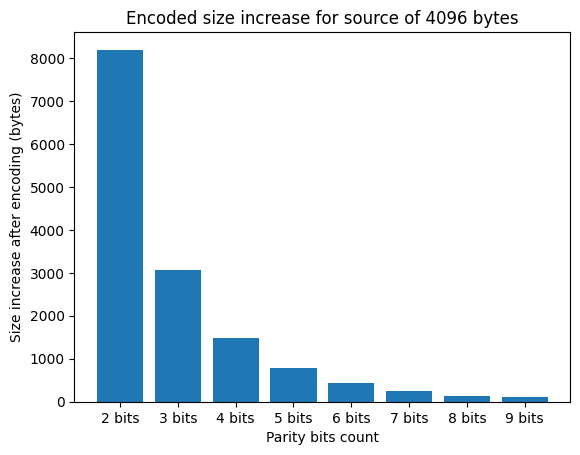

In [ ]:
import matplotlib.pyplot as plt

def calculate_encoded_size(dsize: int, m: int) -> int:
    n = (1 << m) - 1
    k = n - m
    blocks = (dsize * 8 + k - 1) // k
    return (blocks * n + 7) // 8

def encoded_sizes_for_parity_bits(dsize: int, parity_bits_list: list[int]) -> dict[int, int]:
    result = {}
    for m in parity_bits_list:
        result[m] = calculate_encoded_size(dsize, m)
    return result

def plot_encoded_size_increase(sizes: dict[int, int], decoded_size: int):
    parity_bits_list = list(sizes.keys())
    encoded_sizes = list(sizes.values())
    increases = [encoded - decoded_size for encoded in encoded_sizes]

    plt.bar([f"{m} bits" for m in parity_bits_list], increases)
    plt.xlabel("Parity bits count")
    plt.ylabel("Size increase after encoding (bytes)")
    plt.title(f"Encoded size increase for source of {decoded_size} bytes")
    plt.show()

parity_bits = [2, 3, 4, 5, 6, 7, 8, 9]
decoded_size = 4096
sizes = encoded_sizes_for_parity_bits(decoded_size, parity_bits)
plot_encoded_size_increase(sizes, decoded_size)